# This Notebook is my cheatsheet for Using Pandas

### Importing pandas into your project

In [268]:
# %matplotlib ipympl
%matplotlib inline
# 
# you must import Pandas
# inporting them as pd will save you typing pandas over and over again.
import pandas as pd     # if you get an error message module not found you need to add this to your environment.
import os               # this tells your project about the OS of your machine.  This will let you create machine independent notebooks
import numpy as np      # loads in the math tools
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

# For plotting we add addtional dependencies
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns



### Working with Jupyter Notebooks not VSCode
This code will change the width

In [269]:
# change the width of a jupyter notebook in a browser 
# Remove the Comments from the two line below
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

### Checking your environment

In [270]:
pd.__version__          #check the version.
#pd.show_versions()      #this will show the version of installed packages such as panda, and its dependencies.

'1.4.2'

# Read in Data files

In [271]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('./Resources/lax_temperature.csv')
temperatures = temperature_df['Temp (F)']
temperatures.describe()

count    3529.000000
mean       57.655143
std         5.686822
min        40.000000
25%        54.000000
50%        57.000000
75%        60.000000
max        81.000000
Name: Temp (F), dtype: float64

In [272]:
# Demonstrate calculating measures of central tendency using numpy
mean_numpy = round(np.mean(temperatures),1)
median_numpy = round(np.median(temperatures),1)
mode_scipy = st.mode(temperatures)
print(f"Mean = {mean_numpy}  Median =  {median_numpy}  Mode = {mode_scipy}")

# Demonstrate calculating measures of central tendency using pandas
mean = temperature_df['Temp (F)'].mean()
median = temperature_df['Temp (F)'].mode()
mode = temperature_df['Temp (F)'].mode()
print(f"Mean = {mean},  Median =  {median[0]},  Mode = {mode[0]}")

Mean = 57.7  Median =  57.0  Mode = ModeResult(mode=array([57], dtype=int64), count=array([327]))
Mean = 57.65514310002834,  Median =  57,  Mode = 57


In [273]:
temperature_df.head()

,STATION,DATE,REPORT_TYPE,Temp (F)
0,72295023174,2019-01-01T00:49:00,FM-16,52
1,72295023174,2019-01-01T00:53:00,FM-15,51
2,72295023174,2019-01-01T01:53:00,FM-15,52
3,72295023174,2019-01-01T02:53:00,FM-15,49
4,72295023174,2019-01-01T03:53:00,FM-15,43


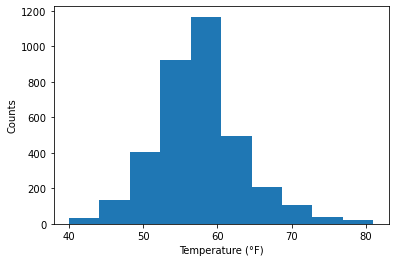

In [274]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)                  # create a histogram letting Matplotlib set the bins
plt.xlabel('Temperature (°F)')          #x axis label
plt.ylabel('Counts')                    #y asis label
plt.show()  

### Test data set for Normality

In [275]:
# Run the normality test on the whole temperatures DataFrame.
sample = temperatures.sample(100)
print(st.normaltest(temperatures.sample(3529)))             # test with whole data set
print(st.normaltest(temperatures.sample(50)))               # test with a random sample of 50.   Test whether a sample differs from a normal, Large value means it is different from normal
                                                            # Renturns s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.


NormaltestResult(statistic=202.53753937770182, pvalue=1.0460010849581777e-44)
NormaltestResult(statistic=9.663983959719285, pvalue=0.007970628111122596)


In [276]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 1)           # ddof = degrees of freedom where  0 = population and 1 = sample
sd_numpy = np.std(temperatures,ddof = 1)            # ddof = degrees of freedom where  0 = population and 1 = sample
print(f"Variance = {var_numpy}  Stdev =  {sd_numpy} ")

# Calculate the 68%-95%-99.7% rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)} degrees F")          #mean +/- 1 standard Deviation
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)} degrees F")      #mean +/- 2 standard Deviation
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)} degrees F")    #mean +/- 3 standard Deviation

Variance = 32.33994023603594  Stdev =  5.686821628646 
Roughly 68% of the data is between 52.013 and 63.387 degrees F
Roughly 95% of the data is between 46.326 and 69.074 degrees F
Roughly 99.7% of the data is between 40.64 and 74.76 degrees F


## Creating Normalize data using z-score

In [277]:
# Demonstrate calculating the z-scores using SciPy
temperature_df['Temp Z-Score'] = st.zscore(temperature_df['Temp (F)'])   # creates a normalize data for temperature
temperature_df.head()

,STATION,DATE,REPORT_TYPE,Temp (F),Temp Z-Score
0,72295023174,2019-01-01T00:49:00,FM-16,52,-0.994570
1,72295023174,2019-01-01T00:53:00,FM-15,51,-1.170440
2,72295023174,2019-01-01T01:53:00,FM-15,52,-0.994570
3,72295023174,2019-01-01T02:53:00,FM-15,49,-1.522181
4,72295023174,2019-01-01T03:53:00,FM-15,43,-2.577401


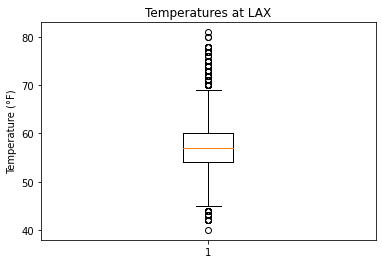

In [278]:
# Example outlier plot of reaction times
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperature_df['Temp (F)'])
plt.show()

### Finding Quartiles

In [279]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperature_df['Temp (F)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)                # outliers are considered anything more than 1.5 IRQ upper or lower quartile
upper_bound = upperq + (1.5*iqr)

print(f' Lower quartile = {lowerq}, Upper quartile = {upperq},  IRQ = {iqr}, median = {quartiles[0.5]}')
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

sem(temperature_df['Temp (F)'])  # Standard error of the mean

 Lower quartile = 54.0, Upper quartile = 60.0,  IRQ = 6.0, median = 57.0
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


0.09572905622798593

# Standard Error of the mean
____________________________________

In [280]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('./Resources/2019_fuel_economy.csv')
fuel_economy.head()

,Type,Combined_MPG,Make_Model
0,Two Seaters,21.0000,Acura_NSX
1,Two Seaters,27.9406,ALFA ROMEO_4C
2,Two Seaters,20.9455,Aston Martin Lagonda Ltd_Vantage V8
3,Two Seaters,25.9952,Audi_TT Roadster quattro
4,Two Seaters,27.6300,BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.54
The standard deviation of all vehicle's MPG is: 5.12


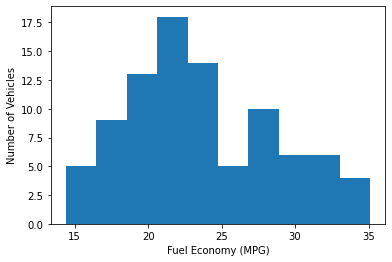

In [281]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)                        # Take a random sample of the 90 observations
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [282]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample['Combined_MPG'])}")

The SEM value for the sample fuel economy data is 1.4182017352237202


# Plot means and SEM for a set of samples

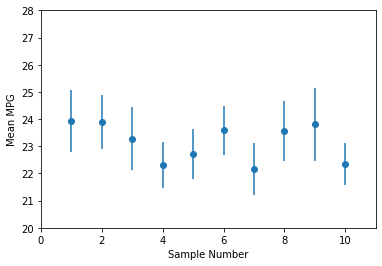

In [283]:
# Create a sample set of 10, each with 30 vehicles
num_veh = 30
num_samples = 10
vehicle_sample_set = [fuel_economy.sample(num_veh) for x in range(0,num_samples)]   # collect a set of 10 samples of 30 values

# Generate the plot data for each sample 
means = [sample['Combined_MPG'].mean() for sample in vehicle_sample_set]            # for each of the samples in the set of samples calculate a mean
standard_errors = [sem(sample['Combined_MPG']) for sample in vehicle_sample_set]    # fore each of the samples in the set calculate the standard error of the mean
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1                               # set the x-axis for the number of samples.  Add 1 so the first sample is not on the y-axis.

# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")                                # x-axis = the samples, the mean is the dot, and 
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)                                                                  # set the limits for the y-axis
ax.set_xlabel("Sample Number")                                                      # label the x-axis
ax.set_ylabel("Mean MPG")                                                           # label the y-axis
plt.show()

In [284]:
# Import the WDI dataset, drop missing data
wdi_data = pd.read_csv('./Resources/WDI_2018.csv')
wdi_data = wdi_data.dropna()
wdi_data.head()

,Country Name,Adjusted net national income per capita (current US$),Population (in thousands) total,Population Median Age,Percent Population over 65,Domestic general government health expenditure (% of general government expenditure),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",People using at least basic drinking water services (% of population),Mobile cellular subscriptions (per 100 people),Mobile cellular subscriptions,"Immunization, measles (% of children ages 12-23 months)",Military expenditure (% of GDP)
0,Afghanistan,473.319371,37171.922,18.9,2.584927,1.798056,66.026,63.047,0.21,69.601931,59.120848,21976355.0,64.0,1.006746
1,Albania,4326.330596,2866.376,32.9,13.744742,9.709609,80.167,76.816,7.17,94.436391,94.176998,2714878.0,94.0,1.161266
2,Algeria,3219.975007,42228.415,28.1,6.362495,10.734436,77.938,75.494,0.95,94.037413,111.664792,47154264.0,80.0,5.467824
4,Angola,2000.546817,30809.787,15.9,2.216374,5.426737,63.666,58.064,6.94,56.591749,43.130519,13288421.0,50.0,1.871776
7,Armenia,3685.765957,2951.741,35.1,11.253833,5.269859,78.354,71.215,5.55,99.951924,121.259018,3579257.0,95.0,4.119886


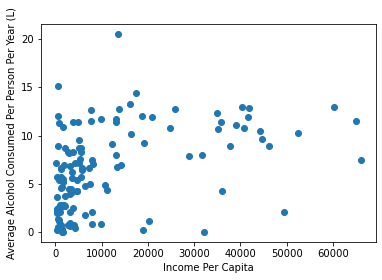

In [285]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(wdi_data.iloc[:,1],wdi_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

In [286]:
wdi_data.columns

Index(['Country Name', 'Adjusted net national income per capita (current US$)',
       'Population (in thousands) total', 'Population Median Age',
       'Percent Population over 65',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'People using at least basic drinking water services (% of population)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mobile cellular subscriptions',
       'Immunization, measles (% of children ages 12-23 months)',
       'Military expenditure (% of GDP)'],
      dtype='object')

# Pearson Correlation

In [287]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
IncomePerCap ='Adjusted net national income per capita (current US$)'
AchoholPerCap = 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'
#income = wdi_data.iloc[:,1]
income = wdi_data[IncomePerCap]                                 # If you only want a subset of the income range use --> income = wdi_data.loc[wdi_data[IncomePerCap]>=500]
alcohol = wdi_data[AchoholPerCap]
correlation = st.pearsonr(income,alcohol)
print(f"The pearson correlation is {round(correlation[0],2)},  p=value = {(correlation[1])}")

The pearson correlation is 0.42,  p=value = 1.086239349439516e-06


In [288]:
wdi_corr = wdi_data.corr()
wdi_corr.unstack().sort_values()
# a=wdi_corr.unstack().sort_values()
file_one = os.path.join('.','Output', 'corr.csv')
wdi_corr.to_csv(file_one, index=False, header=True)    # You can see the correlation matix in the output folder.

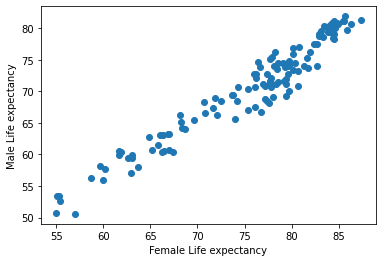

In [289]:
# Plot out rooms versus median house price
x_values = wdi_data['Life expectancy at birth, female (years)']
y_values = wdi_data['Life expectancy at birth, male (years)']
plt.scatter(x_values,y_values)
plt.xlabel('Female Life expectancy')
plt.ylabel('Male Life expectancy')
plt.show()

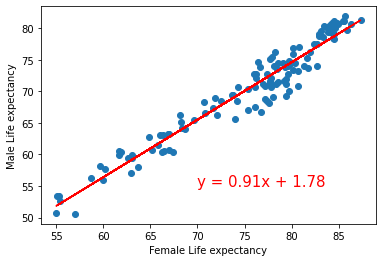

Correlation = (0.9694659832582392, 2.50144899209352e-76)


In [290]:
# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)         # Calculate the regression values slop, intercept r-value 
regress_values = x_values * slope + intercept                                       # Calculate y values for each x value
plt.plot(x_values,regress_values,"r-")                                              # plot the regression line in red (r-)

# Embellish the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))           # Write the equation of line to a string
plt.annotate(line_eq,(70,55),fontsize=15,color="red")                               # Add the equation of the line to the figure, starting at location (70, 55)
plt.xlabel('Female Life expectancy')                                                # Add the x label
plt.ylabel('Male Life expectancy')                                                  # Add the y label
#plt.Figure(figsize=(50,50))
plt.savefig('./Output/myRegression', dpi=600)                                       # This changes the size and resolution of the same
plt.show()                                                                          # Show the plot
correlation = st.pearsonr(wdi_data['Life expectancy at birth, female (years)'], wdi_data['Life expectancy at birth, male (years)'])
print(f'Correlation = {correlation}')